In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
from random import shuffle

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
from keras.utils import to_categorical
from keras.layers import Input,Dense,Conv2D,BatchNormalization,Flatten,MaxPool2D,ReLU,LeakyReLU,Softmax,Dropout
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

In [5]:
od.download('https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading cell-images-for-detecting-malaria.zip to .\cell-images-for-detecting-malaria


100%|██████████| 675M/675M [02:26<00:00, 4.82MB/s] 


In [4]:
dir = './cell-images-for-detecting-malaria/cell_images'
labels = os.listdir(dir)
print(labels)

['Parasitized', 'Uninfected']


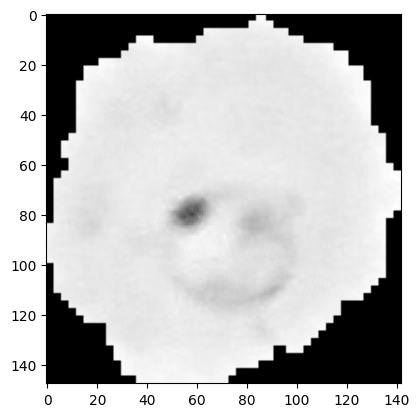

In [5]:
#visualize images

for label in labels:
    path = os.path.join(dir,label)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr,cmap='gray')
        break
    break


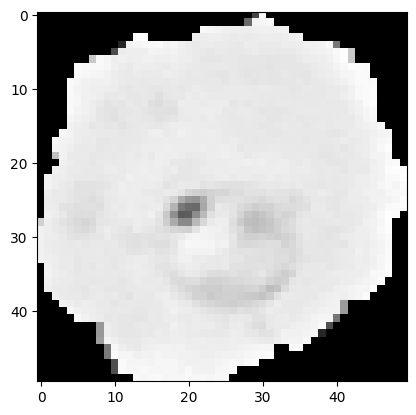

In [6]:
# Testing the  clarity
img_size = 50
temp = cv2.resize(img_arr,(img_size,img_size))
plt.imshow(temp,cmap='gray')
plt.show()

In [7]:
for label in labels:
    print("The class label for {} is {}".format(label,labels.index(label)))

The class label for Parasitized is 0
The class label for Uninfected is 1


In [8]:
X=[]
y=[]

def ds_gen():
    for label in labels:
        path = os.path.join(dir,label)
        class_idx = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
                new_img_arr = cv2.resize(img_arr,(64,64))
                X.append(new_img_arr)
                y.append(class_idx)
            except Exception as e:
                pass

ds_gen()


In [9]:
X_tr,X_test,y_tr,y_test = train_test_split(np.array(X),to_categorical(np.array(y)),train_size=0.75,random_state = 20)
# train_df,val_df = train_test_split(train_val_df,train_size=0.85,stratify=train_val_df['labels'])

In [115]:
# X_train = []
# y_train = []
# # features = train_df['features']
# # labels = train_df['labels']

# # for fi in features:
# #     X_train.append(fi)
# # for li in labels:
# #     y_train.append(li)
# # X_train = np.array(X_train).reshape(-1,64,64,3)

# for fi,li in dataset:
#     X_train.append(fi)
#     y_train.append(li)

# X_train = np.array(X_train).reshape(-1,64,64,3)
# y_train = np.array(y_train)

In [10]:
input_layer = Input(shape=(64,64,3))

x = Conv2D(filters=32,
           kernel_size=3,
           padding='same')(input_layer)
x = LeakyReLU()(x)
x = MaxPool2D((2,2))(x)
x = BatchNormalization()(x)


x = Conv2D(filters=64,
           kernel_size=3,
           padding='same')(input_layer)
x = LeakyReLU()(x)
x = MaxPool2D((2,2))(x)
x = BatchNormalization()(x)


x = Flatten()(x)

x = Dense(units=64)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)


x = Dropout(rate=0.5)(x)

output_layer = Dense(units=2,activation='softmax')(x)

model = Model(input_layer,output_layer)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 65536)             0     

In [12]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [58]:
X_train = X_train/255.0

In [13]:
model.fit(X_tr,y_tr,
          batch_size = 32,
          epochs=10,
          shuffle=True,
          validation_split=0.15
          )

Epoch 1/10
549/549 [==============================] - 13s 18ms/step - loss: 0.7772 - accuracy: 0.6537 - val_loss: 0.6578 - val_accuracy: 0.6704
Epoch 2/10
549/549 [==============================] - 10s 18ms/step - loss: 0.5379 - accuracy: 0.7502 - val_loss: 0.6214 - val_accuracy: 0.6134
Epoch 3/10
549/549 [==============================] - 10s 18ms/step - loss: 0.4733 - accuracy: 0.7900 - val_loss: 2.2492 - val_accuracy: 0.5085
Epoch 4/10
549/549 [==============================] - 10s 18ms/step - loss: 0.4308 - accuracy: 0.8176 - val_loss: 1.2296 - val_accuracy: 0.5108
Epoch 5/10
549/549 [==============================] - 11s 20ms/step - loss: 0.4107 - accuracy: 0.8279 - val_loss: 0.3665 - val_accuracy: 0.8597
Epoch 6/10
549/549 [==============================] - 10s 18ms/step - loss: 0.3807 - accuracy: 0.8449 - val_loss: 0.5006 - val_accuracy: 0.7381
Epoch 7/10
549/549 [==============================] - 10s 18ms/step - loss: 0.3736 - accuracy: 0.8502 - val_loss: 0.5580 - val_accuracy:

In [15]:
loss,acc = model.evaluate(X_test,y_test)

216/216 [==============================] - 2s 9ms/step - loss: 0.3673 - accuracy: 0.8438


In [18]:
print("The test accuracy of the model is {}%".format(round(acc*100,2)))

The test accuracy of the model is 84.38%
